<a href="https://colab.research.google.com/github/GorokhovSemyon/MultimodalLLM/blob/main/Multimodal_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pixtral-12B

In [16]:
%%capture
!pip install --upgrade transformers bitsandbytes

In [ ]:
import requests
from io import BytesIO

from transformers import AutoProcessor, BitsAndBytesConfig, LlavaForConditionalGeneration
from PIL import Image

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)

model_id = "mistral-community/pixtral-12b"
processor = AutoProcessor.from_pretrained(model_id)
model = LlavaForConditionalGeneration.from_pretrained(model_id, quantization_config=bnb_config).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/177k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.26M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/997 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/57.9k [00:00<?, ?B/s]

model-00001-of-00006.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00006.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00006.safetensors:   0%|          | 0.00/4.91G [00:00<?, ?B/s]

model-00004-of-00006.safetensors:   0%|          | 0.00/4.91G [00:00<?, ?B/s]

model-00005-of-00006.safetensors:   0%|          | 0.00/4.26G [00:00<?, ?B/s]

model-00006-of-00006.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

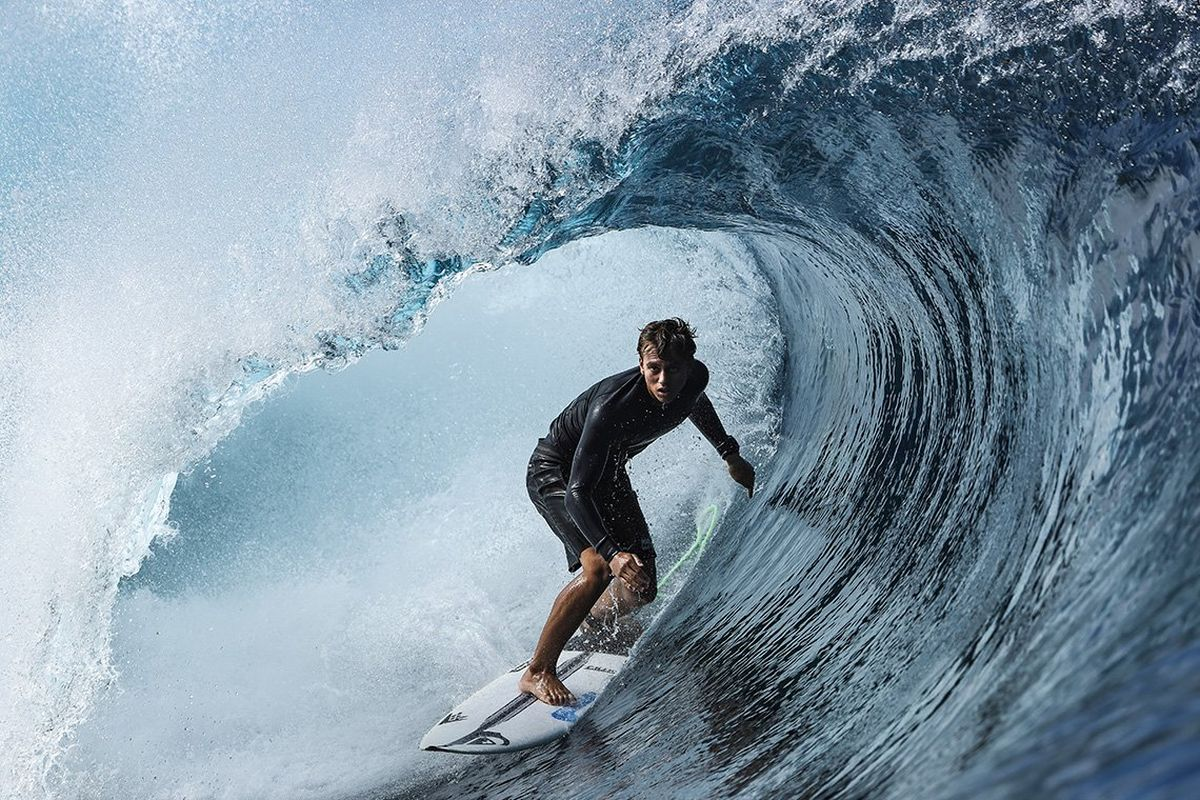

In [ ]:
url_surf = "https://i1.adis.ws/i/canon/canon-pro-ben-thouard-surfing-eos-1d-x-mark-iii-1-1140x760?$og-image$"
url_waterfall = "https://avatars.dzeninfra.ru/get-zen_doc/5367045/pub_614af9ffcac8941189b81493_614afb034c5eca3a707e1efa/scale_1200"

Image.open(BytesIO(requests.get(url_surf).content))

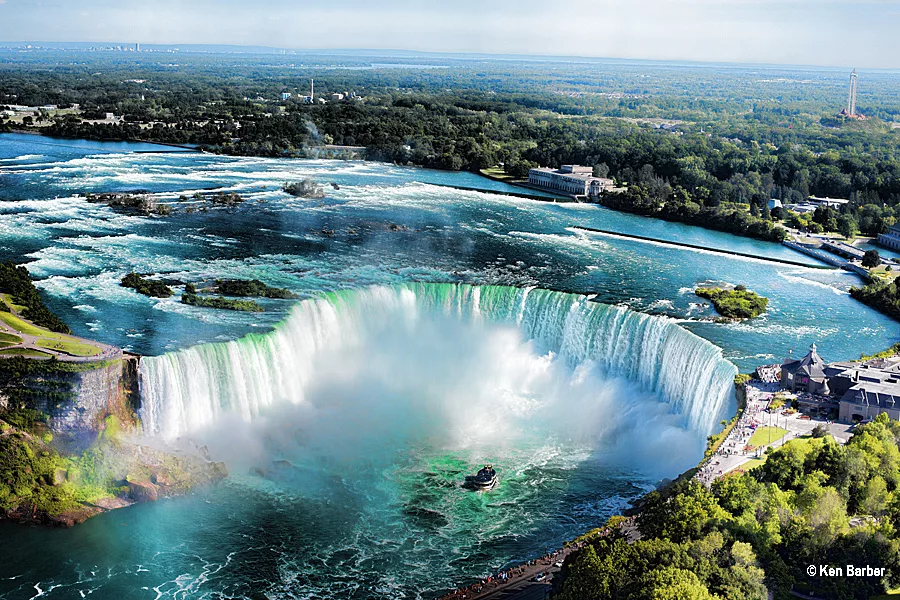

In [ ]:
Image.open(BytesIO(requests.get(url_waterfall).content))

In [ ]:
chat = [
    {
      "role": "user",
      "content": [
        {"type": "text", "content": "В какой стране может быть это место?"},
        {"type": "image"}
      ]
    }
]

prompt = processor.apply_chat_template(chat)
inputs = processor(text=prompt, images=[url_waterfall], return_tensors="pt").to(model.device)
generate_ids = model.generate(**inputs, max_new_tokens=500)
output = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [ ]:
print(output)

В какой стране может быть это место?Это место — Ниагарский водопад, который находится на границе между Канадой и США. Ниагарский водопад — это один из самых известных и посещаемых водопадов в мире, расположенный на реке Ниагара. Он состоит из трех основных секций: Американский водопад, который находится в США, и Канадский водопад и Хорсшу водопад, которые находятся в Канаде. Водопад является природным чудом и популярной туристической достопримечательностью, привлекающей миллионы посетителей каждый год.


In [ ]:
chat = [
    {
      "role": "user", "content": [
        {"type": "text", "content": "Можно ли заниматься этим спортом"},
        {"type": "image"},
        {"type": "text", "content": "в этой локации? Бывают ли там подходящие условия?"},
        {"type": "image"}
      ]
    }
]

prompt = processor.apply_chat_template(chat)
inputs = processor(text=prompt, images=[url_surf, url_waterfall], return_tensors="pt").to(model.device)
generate_ids = model.generate(**inputs, max_new_tokens=500)
output = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

output

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


'Можно ли заниматься этим спортомв этой локации? Бывают ли там подходящие условия?Изображение показывает Ниагарский водопад, известную достопримечательность, расположенную на границе США и Канады. Водопад известен своими мощными и впечатляющими водными потоками, что делает его одним из самых узнаваемых природных чудес мира.\n\n### Можно ли заниматься серфингом в этом месте?\nСерфинг в Ниагарском водопаде не является обычным делом и, вероятно, не рекомендуется по нескольким причинам:\n1. **Безопасность**: Водопады представляют значительные опасности, включая сильные течения и риск травм.\n2. **Логистика**: Серфинг требует определенных условий, таких как волны, которые не характерны для водопадов.\n3. **Экология**: Водопады — это уникальные и чувствительные экосистемы, и серфинг может нанести вред окружающей среде.\n\n### Подходят ли условия для серфинга?\nУсловия для серфинга в Ниагарском водопаде не подходят. Водопады не создают волны, необходимые для серфинга, и попытки серфинга могут

## Выводы

Мультимодальность в языковых моделях (LLM) открывает новые возможности для решения разнообразных задач, так как позволяет моделям обрабатывать данные не только из текста, но и из других источников, таких как изображения, звуки, видео и т. д. Это расширяет спектр информации, доступной моделям, и обогащает их понимание контекста. Например, используя обработку изображений в сотрудничестве с LLM, модели могут "увидеть" изображения, выделять ключевые аспекты и визуальные признаки, что в конечном итоге поможет им лучше понимать контекст и принимать более точные и информированные решения.

Мультимодальная архитектура позволяет моделям принимать во внимание не только текстовую информацию, но и визуальные данные, что способствует более глубокому и богатому пониманию контента. Такой подход делает LLM более гибкими и способными решать разнообразные задачи, такие как визуальный вопросно-ответный анализ, генерация подписей к изображениям, автоматическая ассоциация текста и изображений, анализ контекста и многое другое. Гармоничное сочетание обработки текста и изображений в LLM открывает новые перспективы для развития и применения искусственного интеллекта в различных областях, где требуется анализ мультимодальных данных.